Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Load IRIS Dataset.

In [3]:
Iris_dataframe = pd.read_csv('Iris.csv')
Iris_dataframe.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Check the Dataset count.

In [4]:
Iris_dataframe.shape

(150, 6)

Check the Data is balanced or not based on Class label - Species.

In [5]:
Iris_dataframe.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

we had used Tableau to vizualise the data.
Dashboard link : https://public.tableau.com/profile/karthikeyan4498#!/vizhome/IRIS_EDA/Dashboard1
We will display the Dashboard image below.

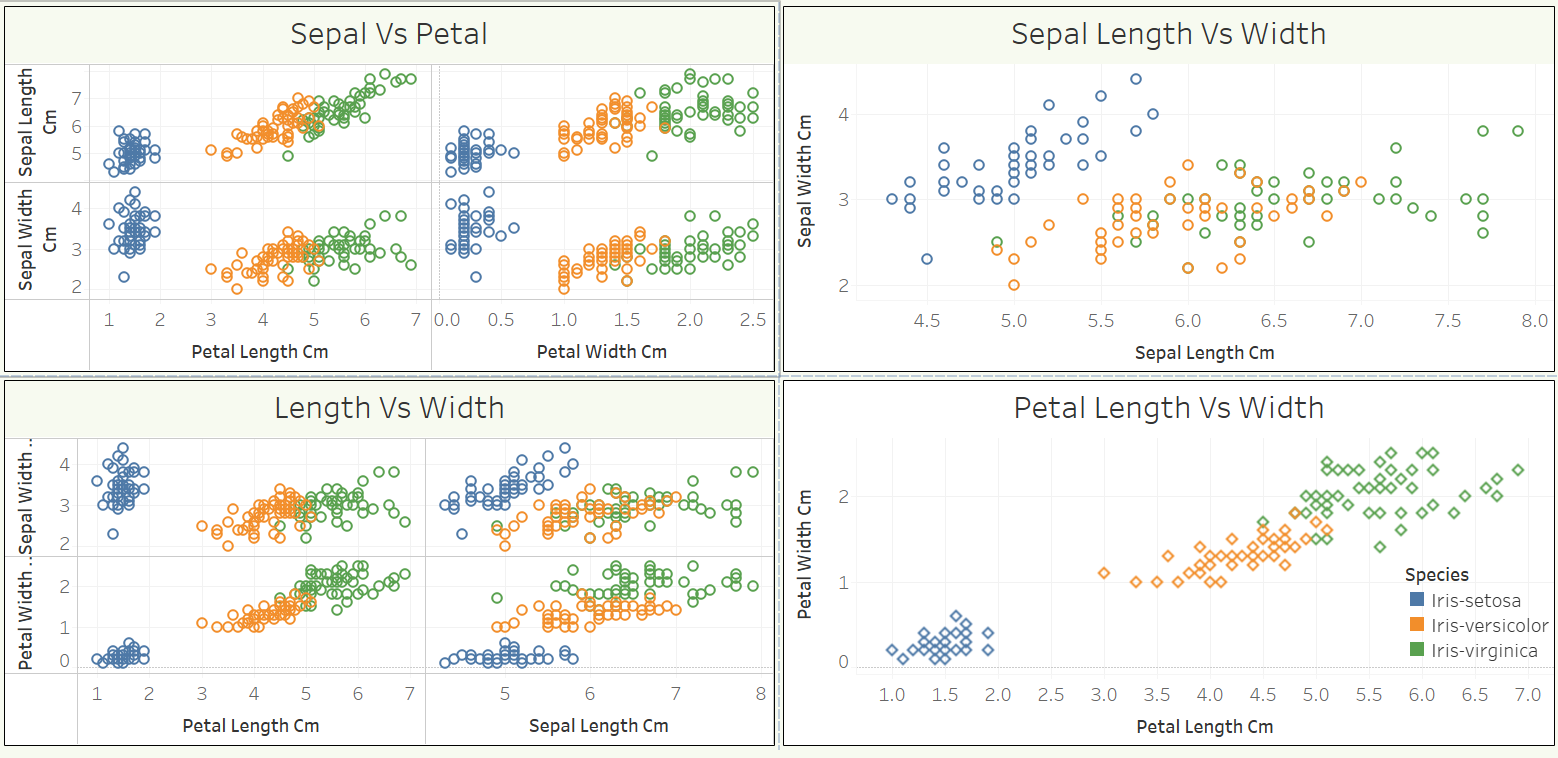

In [6]:
from PIL import Image
Image.open('IRIS_Tableau_Vizualization.png')

Scatterplot shows Cluster is forming in Petal Length Vs Petal Width and Petal Length Vs Sepal Width.Let us create a K-Means Cluster Alogirtm model for both the scenarios.

Create a dataframe for Training model without the Class label(Species).

In [7]:
Train_data = Iris_dataframe.iloc[:, [1,2,3,4]].values
Train_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Using K-Means Cluster Alogirthm to create a model. 
Identify the number of cluster (K Value) using Elbow method.

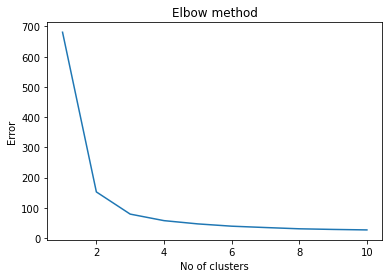

In [8]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(Train_data)
    kmeans.fit(Train_data)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

K Values Lies between 2 and 4. Let us implement the K-Value as 3 and train our model.

In [9]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(Train_data)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [10]:
Iris_dataframe.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Apply model for Petal Length Vs Petal Width

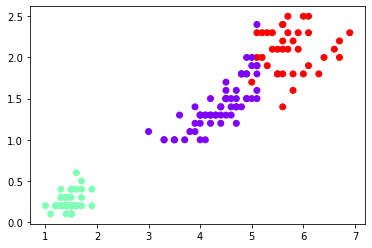

In [11]:
plt.scatter(Train_data[:,2],Train_data[:,3],c=y_kmeans,cmap='rainbow')

Apply model for Petal Length Vs Sepal Width

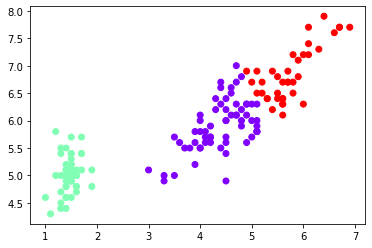

In [12]:
plt.scatter(Train_data[:,2],Train_data[:,0],c=y_kmeans,cmap='rainbow')

By looking at both the Cluster model. Petal Width Vs Sepal Length looks more accurate. Let us compare it with real data to verify it's accuracy.

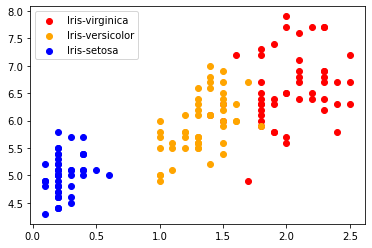

In [28]:
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

for i in range(3):
    x = Iris_dataframe[Iris_dataframe['Species'] == species[i]]
    plt.scatter(x['PetalWidthCm'],x['SepalLengthCm'], c = colors[i], label=species[i])

plt.legend()

Model Evaluation:

In [32]:
from scipy.stats import itemfreq
itemfreq(y_kmeans)

<ipython-input-32-acce60d8e1fc>:2: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  itemfreq(y_kmeans)


array([[ 0, 62],
       [ 1, 50],
       [ 2, 38]], dtype=int64)

In [51]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'Species'. 
Iris_dataframe['Species']= label_encoder.fit_transform(Iris_dataframe['Species']) 
Iris_dataframe['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64